In [ ]:
pip install seaborn
pip install scipy
pip install plotly
pip install pandas

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

Load_data

In [51]:
df = pd.read_csv(r"C:\Users\shank\Desktop\github_data\Student_performance_data _.csv")
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


checking null and duplicates

In [52]:
#checking null values
df.info()
#from this dataset there is no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [53]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [54]:
#checking duplicates
df.duplicated() #it will check the entire row, if entire row is repeated then it will give true as output else false

0       False
1       False
2       False
3       False
4       False
        ...  
2387    False
2388    False
2389    False
2390    False
2391    False
Length: 2392, dtype: bool

In [55]:
df.duplicated().unique()
#by this we can understand there is no duplicate values

array([False])

In [56]:
#in this dataset we can clearly see studentId column has unique values
#so we can make that column as index
df.set_index("StudentID",inplace =True)

In [57]:
df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,,,,,,,,,,,,,,
1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0


In [58]:
#now we only have numeric datas
#no string data and no datetime column

Outliers detection

In [75]:
print(df['StudyTimeWeekly'].describe())


count    2392.000000
mean        9.771992
std         5.652774
min         0.001057
25%         5.043079
50%         9.705363
75%        14.408410
max        19.978094
Name: StudyTimeWeekly, dtype: float64


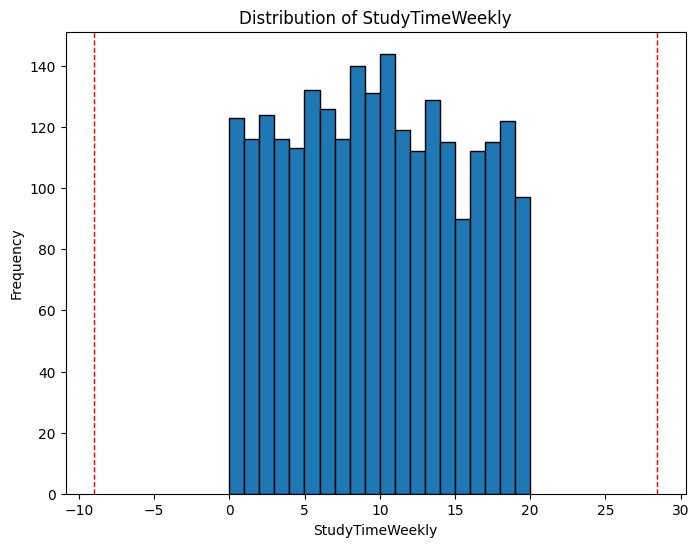

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['StudyTimeWeekly'].dropna(), bins=20, edgecolor='k')
plt.axvline(lower_bound, color='r', linestyle='dashed', linewidth=1)
plt.axvline(upper_bound, color='r', linestyle='dashed', linewidth=1)
plt.title('Distribution of StudyTimeWeekly')
plt.xlabel('StudyTimeWeekly')
plt.ylabel('Frequency')
plt.show()


In [74]:
Q1 = df['StudyTimeWeekly'].quantile(0.25)
Q3 = df['StudyTimeWeekly'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound,upper_bound)
outliers = df[(df['StudyTimeWeekly'] < lower_bound) | (df['StudyTimeWeekly'] > upper_bound)]

print(outliers)


-9.004916417421299 28.456405126475232
Empty DataFrame
Columns: [Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


skewness and kurtosis

In [77]:
from scipy.stats import norm

C:\Users\shank\AppData\Local\Temp\ipykernel_18900\2512890765.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='StudyTimeWeekly', ylabel='Density'>

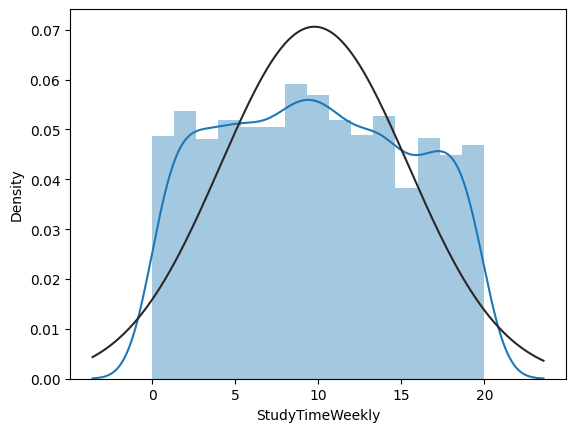

In [79]:
sns.distplot(df["StudyTimeWeekly"],fit = norm)

In [80]:
df["StudyTimeWeekly"].skew() #skew value should near to 0
#no skewness for this column

0.05006807255835409

In [81]:
df["GPA"].skew() #no skewness for this column

0.014525601346976225

In [82]:
for i in df.columns:
  print(i, df[i].skew())

Age 0.03579342435531228
Gender -0.04351583131411828
Ethnicity 0.7590673429528695
ParentalEducation 0.21564996130329658
StudyTimeWeekly 0.05006807255835409
Absences -0.026017090405395748
Tutoring 0.8660445294904519
ParentalSupport -0.16685872350058553
Extracurricular 0.48009368751877385
Sports 0.8552528291302403
Music 1.525338882432287
Volunteering 1.8848514866377293
GPA 0.014525601346976225
GradeClass -0.900807237222296


In [83]:
from scipy.stats import kurtosis

In [84]:
kurtosis(df["StudyTimeWeekly"]) #by fisher method , value should be around 0

-1.1358169615994715

In [85]:
methods = [0,0.5,-0.5,2,-2,-1]
for j in df.columns:
  print(j)
  for i in methods:
    print(f" skewness :{pd.DataFrame(stats.boxcox(df[j],lmbda=i)).skew().values}, kurtosis: {kurtosis(df[j])}")

Age
 skewness :[-0.02834784], kurtosis: -1.371740386570325
 skewness :[0.00370212], kurtosis: -1.371740386570325
 skewness :[-0.06030582], kurtosis: -1.371740386570325
 skewness :[0.09989788], kurtosis: -1.371740386570325
 skewness :[-0.15512901], kurtosis: -1.371740386570325
 skewness :[-0.09212159], kurtosis: -1.371740386570325
Gender
 skewness :[nan], kurtosis: -1.998108747044917
 skewness :[-0.04351583], kurtosis: -1.998108747044917
 skewness :[nan], kurtosis: -1.998108747044917
 skewness :[-0.04351583], kurtosis: -1.998108747044917
 skewness :[nan], kurtosis: -1.998108747044917
 skewness :[nan], kurtosis: -1.998108747044917
Ethnicity
 skewness :[nan], kurtosis: -0.7684375631704552
 skewness :[0.2641079], kurtosis: -0.7684375631704552
 skewness :[nan], kurtosis: -0.7684375631704552
 skewness :[1.60186278], kurtosis: -0.7684375631704552
 skewness :[nan], kurtosis: -0.7684375631704552
 skewness :[nan], kurtosis: -0.7684375631704552
ParentalEducation
 skewness :[nan], kurtosis: -0.288

c:\Users\shank\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1248: RuntimeWarning:

invalid value encountered in subtract



statistical testing

In [27]:
#correlation checking - corr value should be nearer to 1 or -1
#if its nearer to 1/-1 then there is some connectivity between those two columns

corr_matrix =df.corr()
corr_matrix

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
Age,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733
Sports,-0.046320,-0.008897,-0.004484,0.002029,0.006836,0.041454,0.006278,-0.006176,-0.011820,1.000000,-0.020474,-0.002799,0.057859,-0.026654


#correlation Observations:

Age:Shows weak correlations with other variables, indicating that age may not have a strong linear relationship with other factors.

Gender:Shows very weak correlations with most variables. Since gender is typically a categorical variable, correlations with continuous variables may be minimal.

Ethnicity:Like gender, ethnicity has weak correlations with most variables. This suggests little to no linear relationship with other factors in this context.

ParentalEducation:Has a small positive correlation with GPA (0.041031), indicating that higher parental education may slightly be associated with higher GPA.

StudyTimeWeekly:Shows a moderate positive correlation with GPA (0.179327), suggesting that more study time per week is associated with better GPA.

Absences:Strong negative correlation with GPA (-0.919314) and moderate positive correlation with GradeClass (0.728633). This implies that more absences are strongly associated with lower GPA and higher grade classes (which could mean lower performance or more challenging grades).

Tutoring:Shows a moderate positive correlation with GPA (0.145119), suggesting that tutoring might be associated with better GPA, though the relationship is not very strong.

ParentalSupport:Shows a moderate positive correlation with GPA (0.190774), indicating that parental support might be associated with a better GPA.

Extracurricular, Sports, Music, and Volunteering: These variables have weak to moderate correlations with GPA, suggesting limited impact on academic performance.

GradeClass:hows a strong negative correlation with GPA (-0.782835), indicating that higher grade classes are strongly associated with lower GPA.

In [28]:
#Variables like StudyTimeWeekly, Absences, and ParentalSupport could be important 

Hypothesis testing

In [29]:
for i in df.columns:
  print(i,df[i].nunique())

Age 4
Gender 2
Ethnicity 4
ParentalEducation 5
StudyTimeWeekly 2392
Absences 30
Tutoring 2
ParentalSupport 5
Extracurricular 2
Sports 2
Music 2
Volunteering 2
GPA 2371
GradeClass 5


In [31]:
cont = []
cat = []
for i in df.columns:
  if df[i].nunique()>30:
    cont.append(i)
  else:
    cat.append(i)

print(cont,cat)

['StudyTimeWeekly', 'GPA'] ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']


In [39]:
def two_sample(d1,d2): #for two continous variable
  m =[0,0]
  for i in range(31):
    sample1 = d1.sample(frac=0.03)
    sample2 = d2.sample(frac=0.04)
    t_test, p_value = stats.ttest_ind(sample1,sample2)
    if p_value < 0.04:
      m[1]+=1
    else:
      m[0]+=1
    if m[0]>m[1]:
      return True
    elif m[0]<m[1]:
      return False

def chi_square(d1,d2): #for two categorical variable
  return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1]<0.075 else False

def annova(d1,d2): #assume d1 - continous, d2 - category (for 1cat and 1cont variable)
  group = df[d2].unique()

  data1 = {}
  for i in group:
    data1[i]=df[d1][df[d2]==i]


  f_value , p_value = stats.f_oneway(*[i for i in data1.values()])
  if p_value<0.075:
    return False
  else:
    return True



In [40]:
final = {}
for i in df.columns:
  final[i] = {}
  for j in df.columns:

    if i in cont and j in cont:
      result = two_sample(df[i],df[j])

    elif i in cat and j in cat:
      result = chi_square(df[i],df[j])

    elif i in cont and j in cat:
      result = annova(i,j)

    elif i in cat and j in cont:
      result = annova(j,i)
    if result :
      final[i][j]=1
    else:
      final[i][j]=0

In [41]:
final_df = pd.DataFrame(final)
final_df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
Age,1,1,0,0,1,1,0,1,0,1,0,0,1,0
Gender,1,1,0,0,1,0,0,0,0,0,0,0,1,0
Ethnicity,0,0,1,0,1,0,0,0,0,0,0,0,1,0
ParentalEducation,0,0,0,1,1,0,0,0,0,0,1,0,1,0
StudyTimeWeekly,1,1,1,1,1,1,1,1,1,1,1,1,0,0
Absences,1,0,0,0,1,1,0,0,0,0,0,0,0,1
Tutoring,0,0,0,0,1,0,1,0,0,0,0,1,0,1
ParentalSupport,1,0,0,0,1,0,0,1,0,0,0,0,0,1
Extracurricular,0,0,0,0,1,0,0,0,1,0,0,0,0,1
Sports,1,0,0,0,1,0,0,0,0,1,0,0,0,0


<Axes: >

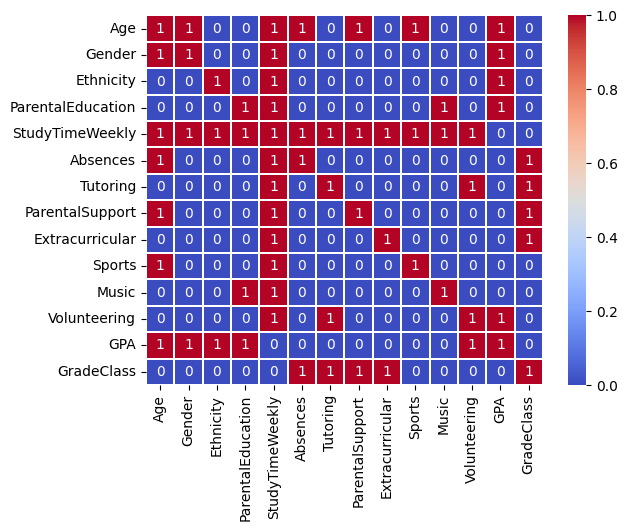

In [42]:
sns.heatmap(final_df,cmap ="coolwarm",linewidths=0.2,annot=True)

Hypothesis testing obrevations

from this heatmap we can cleary see studytimeweekly column has strong connection between most of the variables

rest all columns has no strong relationship with others